In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("data.csv")
#data = data.iloc[1:,:]
data['low'] = data['low'].astype(float)
data['high'] = data['high'].astype(float)
data['average'] = data[['low', 'high']].mean(axis=1)
dataset = data[['average','volume','open']]

split1 = int(0.8 * dataset.shape[0])
split2= int(.2*dataset.shape[0])
training_data = dataset[:split1]
testing_data = dataset[split1:]
real_stock=testing_data[['open']]
dataset = data[['average','volume']]
training_data = dataset[:split1]
testing_data = dataset[split1:]
print(training_data.shape)



(604, 2)


In [3]:
# 30 20
from sklearn.preprocessing import MinMaxScaler
def Vol(training_set_scaled):
    X_train=[]  
    Y_train=[]
    X1_train=[]
    for i in range(0,len(training_set_scaled)):
        val=training_set_scaled[i][1]
        X1_train.append(val)
    X1_train=np.array(X1_train)
    return X1_train
def VOL_AVG(time_step,X1_train,training_set_scaled):
    X1=[]
    Y=[]
    X2=[]
    for i in range(time_step,len(training_set_scaled)):
    
        X1.append(training_set_scaled[i-time_step:i,0])
        X2.append(X1_train[i-time_step:i,0])
        Y.append(training_set_scaled[i,0])
    return X1,X2,Y
def global_lis1(X_train,X2_train):
    lis1=[]
    lis=[]
    
    for i in range(len(X_train)):
        a=X_train[i]
        b=X2_train[i]
        lis.append(a)
        lis.append(b)
        lis1.append(lis)
        lis=[]
    return lis1
def Recurrent_Neural_Network(cell_count, time_step, training_set, layer):

    xyz=data[['open']]
    sc1=MinMaxScaler(feature_range = (0,1))
    tra=sc1.fit_transform(xyz)
   
    
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_data)
  
    X_train=[]  
    Y_train=[]
    X1_train=[]
    X2_train=[]
 
    X1_train=Vol(training_set_scaled)
    X1_train=np.array(X1_train)

    X1_train=X1_train.reshape(len(X1_train),1)
   
    X_train,X2_train,Y_train=VOL_AVG(time_step,X1_train,training_set_scaled)
    X_train=np.array(X_train)
    Y_train=np.array(Y_train)
    X2_train=np.array(X2_train)
    global_lis=[]
    global_lis=global_lis1(X_train,X2_train)
   
    X_train=np.array(global_lis)
    print(X_train.shape)
        
    X_train, Y_train = np.array(X_train), np.array(Y_train)
  

    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], time_step, 2))
   

    
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = cell_count, return_sequences = True, input_shape = (X_train.shape[1], 2)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer and some Dropout regularisation
    if layer > 2:
        regressor.add(LSTM(units = cell_count, return_sequences = True))
        regressor.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = cell_count))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))
    
    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    
    

    # Fitting the RNN to the Training set
    regressor.fit(X_train, Y_train, epochs = 3, batch_size = 32)
    
    
 
    
    dataset_total = pd.concat((training_data, testing_data), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(testing_data) - time_step:].values
    for i in range(len(inputs)):
         inputs[i][0]=float(inputs[i][0])
  
    print("mai shape ",inputs.shape)
    #inputs = inputs.reshape(-1 ,1)
    testing_set_scaled=sc.fit_transform(inputs)
    print("saled dim",testing_set_scaled.shape)
    X_train=[]
    Y_train=[]
    X1_train=[]
    X2_train=[]
    
    X1_train=Vol(testing_set_scaled)
    X1_train=np.array(X1_train)

    X1_train=X1_train.reshape(len(X1_train),1)
    
       
    X_train,X2_train,Y_train=VOL_AVG(time_step,X1_train,testing_set_scaled)
    X_train=np.array(X_train)
    
    X2_train=np.array(X2_train)
    global_lis=[]
    lis=[]
    global_lis=global_lis1(X_train,X2_train)
    X_train=np.array(global_lis)
    print(X_train.shape)
    # Visualising the results
    X_train = np.reshape(X_train, (X_train.shape[0], time_step, 2))
    predicted_stock_price = regressor.predict(X_train)
    predicted_stock_price = sc1.inverse_transform(predicted_stock_price)
    plt.plot(real_stock, color = 'red', label = 'Real Google Stock Price')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 30 20
--------------------------------------------------------------------------------
(584, 2, 20)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
584/584 [==============================] - 4s 6ms/sample - loss: 0.1320
Epoch 2/3
584/584 [==============================] - 0s 628us/sample - loss: 0.0362
Epoch 3/3
584/584 [==============================] - 0s 653us/sample - loss: 0.0250
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


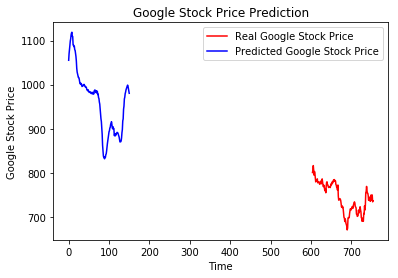

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 30 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 2s 4ms/sample - loss: 0.1497
Epoch 2/3
554/554 [==============================] - 1s 1ms/sample - loss: 0.0675
Epoch 3/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0602
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


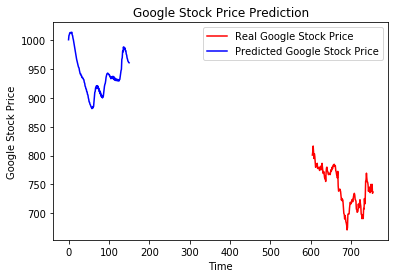

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 30 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 3s 5ms/sample - loss: 0.1637
Epoch 2/3
529/529 [==============================] - 1s 2ms/sample - loss: 0.0755
Epoch 3/3
529/529 [==============================] - 1s 2ms/sample - loss: 0.0657
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


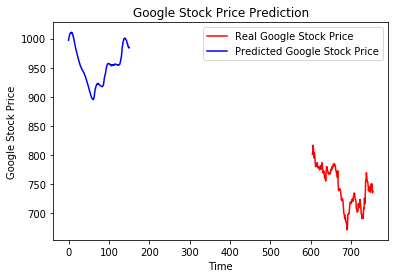

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 50 20
--------------------------------------------------------------------------------
(584, 2, 20)
Epoch 1/3
584/584 [==============================] - 2s 4ms/sample - loss: 0.1161
Epoch 2/3
584/584 [==============================] - 0s 755us/sample - loss: 0.0337
Epoch 3/3
584/584 [==============================] - 0s 747us/sample - loss: 0.0228
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


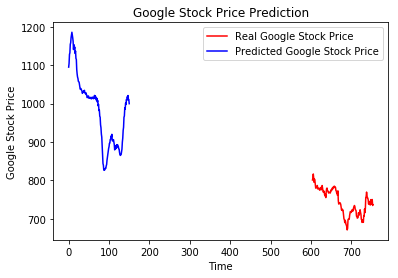

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 50 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 3s 5ms/sample - loss: 0.1372
Epoch 2/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0611
Epoch 3/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0496
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


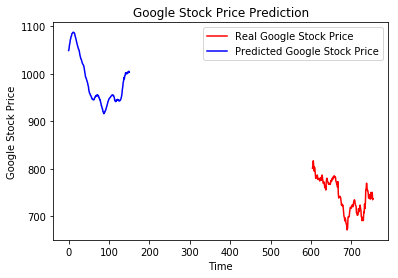

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 50 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 3s 7ms/sample - loss: 0.1323
Epoch 2/3
529/529 [==============================] - 1s 3ms/sample - loss: 0.0656
Epoch 3/3
529/529 [==============================] - 1s 2ms/sample - loss: 0.0610
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


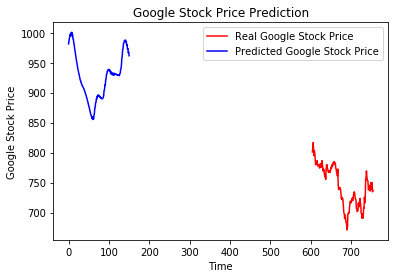

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 80 20
--------------------------------------------------------------------------------
(584, 2, 20)
Epoch 1/3
584/584 [==============================] - 3s 6ms/sample - loss: 0.0809
Epoch 2/3
584/584 [==============================] - 0s 719us/sample - loss: 0.0259
Epoch 3/3
584/584 [==============================] - 0s 825us/sample - loss: 0.0120
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


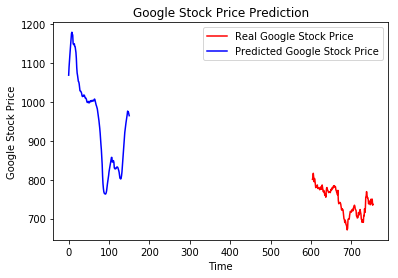

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 80 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 4s 7ms/sample - loss: 0.1291
Epoch 2/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0514
Epoch 3/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0253
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


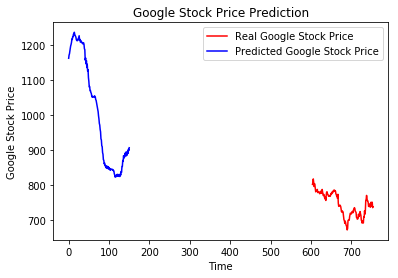

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
2 80 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 4s 9ms/sample - loss: 0.1236
Epoch 2/3
529/529 [==============================] - 1s 3ms/sample - loss: 0.0693
Epoch 3/3
529/529 [==============================] - 1s 3ms/sample - loss: 0.0634
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


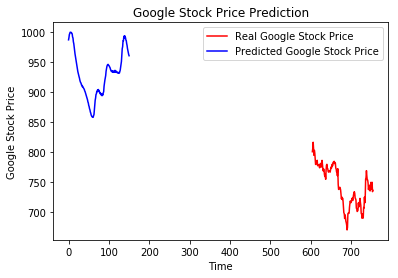

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 30 20
--------------------------------------------------------------------------------
(584, 2, 20)
Epoch 1/3
584/584 [==============================] - 4s 8ms/sample - loss: 0.1365
Epoch 2/3
584/584 [==============================] - 0s 851us/sample - loss: 0.0343
Epoch 3/3
584/584 [==============================] - 0s 853us/sample - loss: 0.0236
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


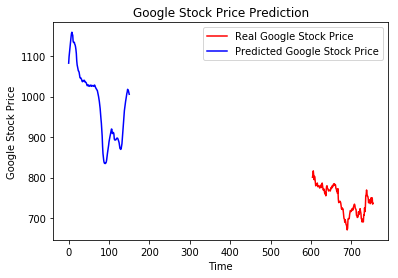

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 30 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 5s 10ms/sample - loss: 0.1370
Epoch 2/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0503
Epoch 3/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0375
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


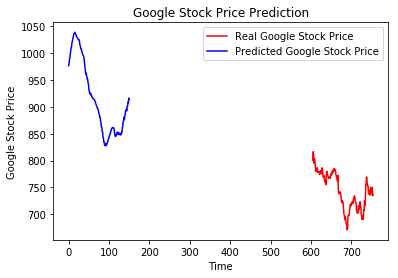

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 30 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 6s 12ms/sample - loss: 0.1319
Epoch 2/3
529/529 [==============================] - 2s 3ms/sample - loss: 0.0647
Epoch 3/3
529/529 [==============================] - 2s 3ms/sample - loss: 0.0611
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


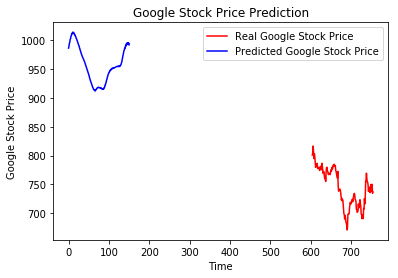

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 50 20
--------------------------------------------------------------------------------
(584, 2, 20)
Epoch 1/3
584/584 [==============================] - 6s 10ms/sample - loss: 0.0761
Epoch 2/3
584/584 [==============================] - 1s 964us/sample - loss: 0.0230
Epoch 3/3
584/584 [==============================] - 1s 916us/sample - loss: 0.0118
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


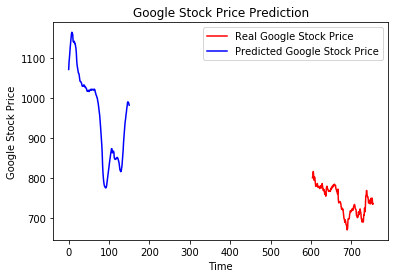

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 50 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 7s 13ms/sample - loss: 0.1108
Epoch 2/3
554/554 [==============================] - 1s 2ms/sample - loss: 0.0452
Epoch 3/3
554/554 [==============================] - 1s 3ms/sample - loss: 0.0206
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


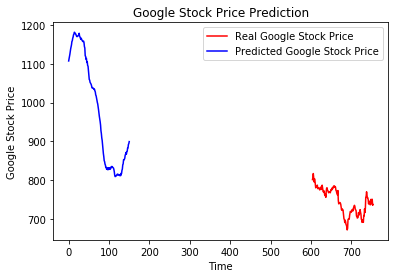

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 50 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 8s 16ms/sample - loss: 0.1175
Epoch 2/3
529/529 [==============================] - 2s 4ms/sample - loss: 0.0683
Epoch 3/3
529/529 [==============================] - 2s 3ms/sample - loss: 0.0638
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


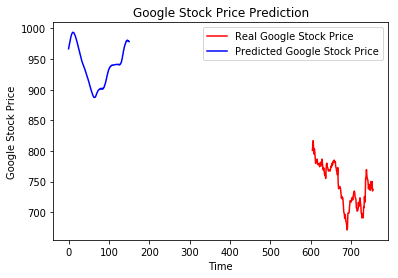

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 80 20
--------------------------------------------------------------------------------
(584, 2, 20)
Epoch 1/3
584/584 [==============================] - 7s 12ms/sample - loss: 0.0736
Epoch 2/3
584/584 [==============================] - 1s 1ms/sample - loss: 0.0176
Epoch 3/3
584/584 [==============================] - 1s 1ms/sample - loss: 0.0095
mai shape  (171, 2)
saled dim (171, 2)
(151, 2, 20)


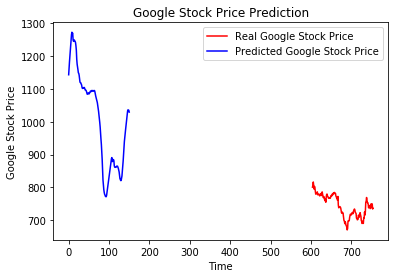

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 80 50
--------------------------------------------------------------------------------
(554, 2, 50)
Epoch 1/3
554/554 [==============================] - 9s 16ms/sample - loss: 0.1027
Epoch 2/3
554/554 [==============================] - 2s 4ms/sample - loss: 0.0465
Epoch 3/3
554/554 [==============================] - 2s 3ms/sample - loss: 0.0216
mai shape  (201, 2)
saled dim (201, 2)
(151, 2, 50)


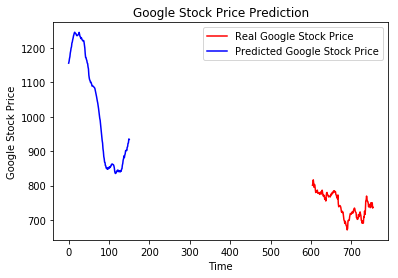

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
3 80 75
--------------------------------------------------------------------------------
(529, 2, 75)
Epoch 1/3
529/529 [==============================] - 10s 19ms/sample - loss: 0.1168
Epoch 2/3
529/529 [==============================] - 3s 5ms/sample - loss: 0.0661
Epoch 3/3
529/529 [==============================] - 2s 4ms/sample - loss: 0.0622
mai shape  (226, 2)
saled dim (226, 2)
(151, 2, 75)


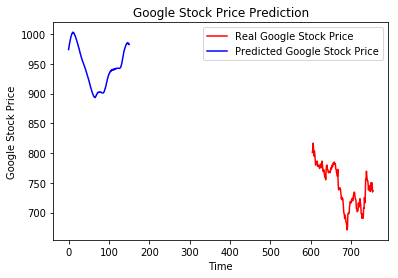

In [4]:

for layer in [2,3]:
    for cells in [30,50,80]:
        for time in [20,50,75]:
            print("--------------------------------------------------------------------------------")
            print("--------------------------------------------------------------------------------")
            print(layer,cells,time)
            print("--------------------------------------------------------------------------------")
            Recurrent_Neural_Network(cells, time, training_data, layer)